# Notebook 3: Correlation Analysis of Milling Process Data

In the previous notebook, we applied a **low-pass Butterworth filter** to remove high-frequency noise from the signals.

---

### Additional Preprocessing (done outside of the notebooks):

To prepare the data for analysis, the following steps were completed **outside of this notebook** (e.g. via preprocessing scripts):

- **Non-cutting sections**, where the tool was not engaged with the workpiece were removed.  
  This segmentation was based on the **engagement width**, which was determined using **cutting simulations**.
  
- Signal values below **0.1** were filtered out to exclude irrelevant low-activity regions.

- All cleaned and segmented trials were then **concatenated into a single dataset** containing only cutting data.

The resulting dataset represents **filtered, relevant signal sections** across multiple experiments.

---

### Goal of this Notebook:

In this notebook, we will perform a **correlation analysis** to:

- Explore relationships between different physical signals (currents, forces, positions, etc.)
- Understand how different features correlate with the **spindle current** and **tool load**
- Identify redundant or highly correlated signals

## First Look at the Concatenated Spindle Current Signal

Before we dive into correlation analysis, we start by plotting the **filtered and segmented spindle current signal (`ACT_CURRENT_S`)** from the combined dataset.

---

### Interpretation:

- The signal shown includes **only active cutting phases**, filtered and segmented across all experiments.
- You will notice that the **amplitude of the spindle current varies significantly** from one segment to another.
- This variation is expected:  
  > Tools with **larger diameters** require significantly **higher spindle currents** due to increased cutting load.

Such amplitude differences reflect the diversity in tool geometry and process settings.

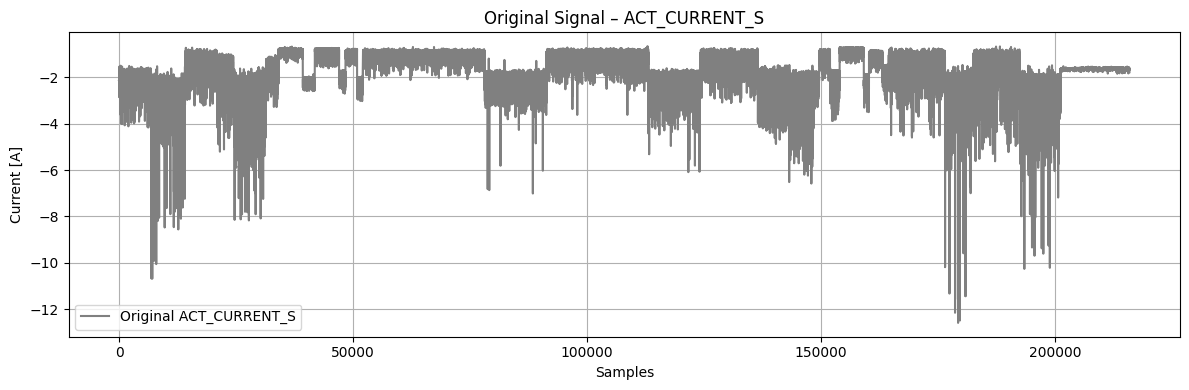

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


df = pd.read_csv("Rough_Train_New.csv")

# Plot: Spindle current
plt.figure(figsize=(12, 4))
plt.plot(df['ACT_CURRENT_S'], color='gray', label='Original ACT_CURRENT_S')
plt.title('ACT_CURRENT_S')
plt.xlabel('Samples')
plt.ylabel('Current [A]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## Explanation of the Solution

1. **Column Selection**  
   We first select only the columns of interest from the DataFrame, focusing on process variables such as spindle speed, feed rate, cutting forces, and currents.

2. **Correlation Matrix**  
   Using `pandas.DataFrame.corr()`, we compute the correlation matrix, which measures the linear relationship between each pair of variables.

3. **Heatmap Visualization**  
   With `seaborn.heatmap()`, we create a heatmap to visually inspect correlations.  
   - `annot=True` displays the correlation coefficients inside the cells.  
   - `cmap='coolwarm'` provides a diverging color palette where strong positive 
     and negative correlations are easy to distinguish.  
   - `linewidths=0.5` separates the cells with thin lines for readability.


This visualization helps to quickly identify strong correlations between variables, which can be useful for feature selection, multicollinearity analysis, or gaining insights into process behavior.


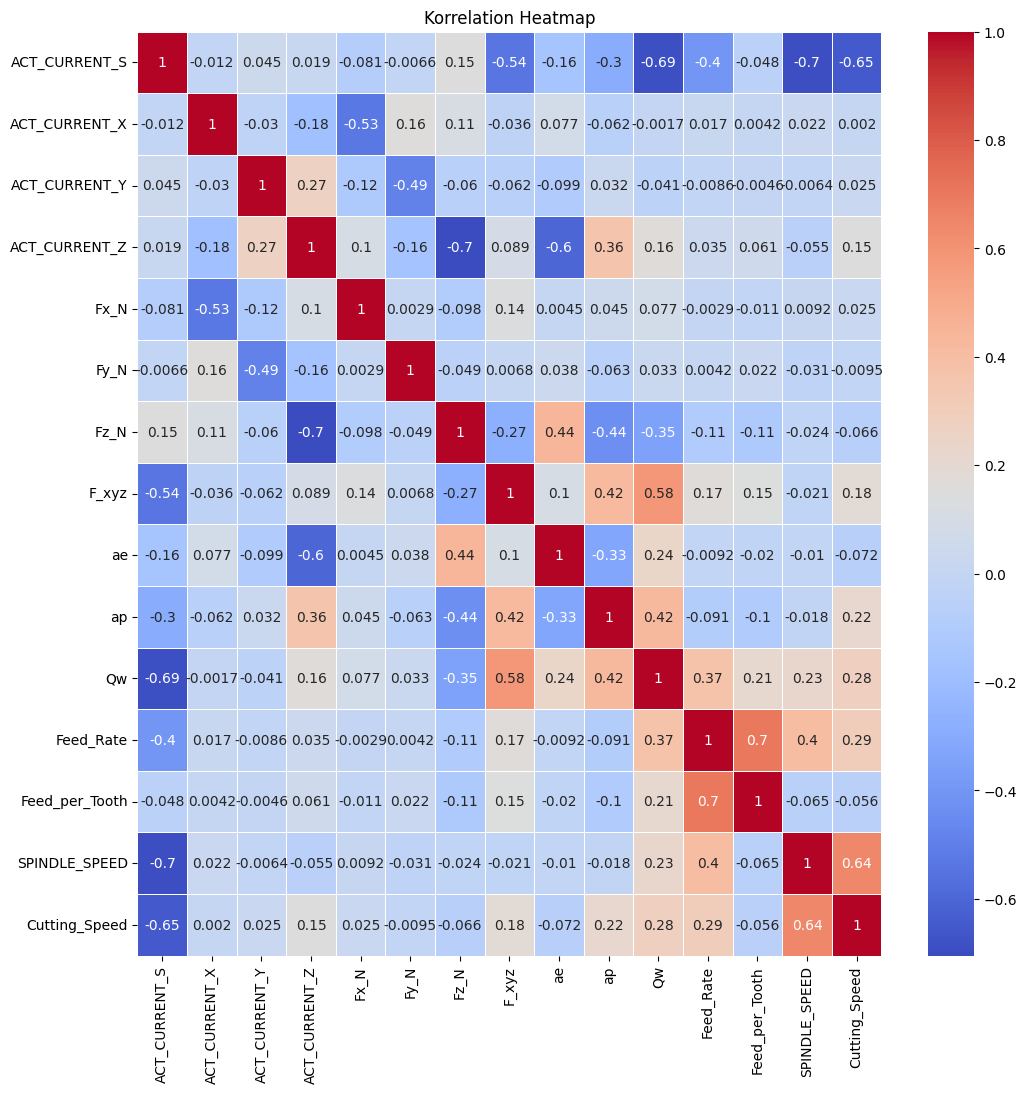

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select specific columns from the DataFrame
columns_of_interest = [
    'ACT_CURRENT_S', 'ACT_CURRENT_X', 'ACT_CURRENT_Y', 'ACT_CURRENT_Z',
    'Fx_N', 'Fy_N', 'Fz_N', 'F_xyz',
    'ae', 'ap', 'Qw', 'Feed_Rate', 'Feed_per_Tooth',
    'SPINDLE_SPEED', 'Cutting_Speed'
]

data_selected = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = data_selected.corr()

# Create the heatmap with seaborn
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add a title to the heatmap
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


# Interpretation of the Correlation Matrix

### 1. **Axis Currents (ACT_CURRENT_X, Y, Z) and Spindle Current (ACT_CURRENT_S)**:
   - There is a weak negative correlation between the **spindle current (ACT_CURRENT_S)** and the axis currents in the various axes (ACT_CURRENT_X, ACT_CURRENT_Y, ACT_CURRENT_Z).
   - This suggests that an increase in spindle current tends to be associated with a decrease in the axis currents. This relationship might indicate that the currents in the axes and the spindle somewhat compete depending on the operating conditions.

### 2. **Spindle Speed (SPINDLE_SPEED) and Spindle Current (ACT_CURRENT_S)**:
   - A strong positive correlation of 0.64 shows that a higher **spindle speed** is generally associated with a higher **spindle current**. This means that the spindle consumes more current at higher rotational speeds, which should be considered when optimizing energy efficiency.

### 3. **Cutting Parameters (Cutting_Speed and Feed_Rate)**:
   - **Cutting speed (Cutting_Speed)** and **spindle speed (SPINDLE_SPEED)** show a moderate positive correlation of 0.64. This indicates that cutting speed is directly related to spindle speed.
   - **Feed rate (Feed_Rate)** has only a weak correlation with other parameters, suggesting that it is less directly related to spindle speed and axis currents.

### 4. **Forces (Fx_N, Fy_N, Fz_N)**:
   - The forces on the different axes (Fx_N, Fy_N, Fz_N) are weakly correlated with the axis and spindle currents. For instance, **Fx_N** shows a slight negative correlation with **ACT_CURRENT_X**, suggesting that an increase in force on the X-axis tends to be associated with a decrease in current on this axis.
   - However, stronger correlations are seen in the composite forces, such as **F_xyz**, which show moderate values with respect to spindle current and axis currents.


